<a href="https://colab.research.google.com/github/SeibelT/colab/blob/master/frommatlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training a network with Keras**

 **Import libraries**

In [0]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D,Dropout

from keras.applications.resnet50 import ResNet50


from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras import Model,layers
from keras.optimizers import Adam,SGD,Adadelta
from sklearn.metrics import classification_report, confusion_matrix


# Import Data

To be able to import Data in google Colaboratory, we have to connect to My_Drive first

In [12]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount("My_Drive")

Mounted at My_Drive


If not working try "Reset all Runtime" in Runtime-menu or try following code(remove hashtags first):

# Datagen for training, validation and testing

target_size equal to Model input_size


In [13]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
     'My_Drive/My Drive/TransferedMatlabcode/data_rearranged/training',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
     'My_Drive/My Drive/TransferedMatlabcode/data_rearranged/validation',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True)






Found 3496 images belonging to 8 classes.
Found 760 images belonging to 8 classes.


# Prepare Model

**Load Resnet without top layers and create own model**

In [14]:
base_model=ResNet50(weights='imagenet',include_top=False) #imports the Restnet50 model without last layers.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x) #add some dense layers, Dropoutlayers(less overfitting)
x=Dropout(0.3)(x)
x=Dense(128,activation='relu')(x) #dense layer 2
x=Dropout(0.3)(x)
x=Dense(64,activation='sigmoid')(x) #dense layer 3
preds=Dense(8,activation='softmax')(x) #final layer with softmax 
model=Model(inputs=base_model.input,outputs=preds)


#show Layers from new model
#for i,layer in enumerate(model.layers):
#  print(i,layer.name)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


# Train Model

with different Optimizer
select optimizer, make if-Function True, others False

In [15]:
if True:
  """Adam Optimizer"""
  ADAM=keras.optimizers.Adam(lr=0.0002, beta_1=0.9, beta_2=0.999, amsgrad=False)
  model.compile(loss='categorical_crossentropy',optimizer=ADAM,metrics=['accuracy'])
  # Adam optimizer
  # loss function will be categorical cross entropy, since dataset has more categories
  # evaluation metric will be accuracy

if False:
  """SGD Optimizer"""
  sgd=keras.optimizers.SGD(lr=0.001)
  model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
if False:
  """Adadelta optimizer"""
  adadelt= keras.optimizers.Adadelta(lr=0.1)
  model.compile(loss='categorical_crossentropy',optimizer=adadelt,metrics=['accuracy'])

  


"""train model,(later use history for confusion matrix)"""

step_size_train=train_generator.n//train_generator.batch_size
step_size_valid=validation_generator.n//train_generator.batch_size

history=model.fit_generator(generator=train_generator,
                    validation_data=validation_generator, validation_steps=step_size_valid, validation_freq=1,
                   steps_per_epoch=step_size_train,
                   epochs=15
                   )



Epoch 1/15
109/109 [==============================] - 1112s 10s/step - loss: 1.0169 - acc: 0.7537 - val_loss: 0.4383 - val_acc: 0.8940
Epoch 2/15
109/109 [==============================] - 104s 951ms/step - loss: 0.5226 - acc: 0.8968 - val_loss: 1.1556 - val_acc: 0.6497
Epoch 3/15
109/109 [==============================] - 103s 946ms/step - loss: 0.4349 - acc: 0.9000 - val_loss: 0.8735 - val_acc: 0.7514
Epoch 4/15
109/109 [==============================] - 103s 945ms/step - loss: 0.3315 - acc: 0.9266 - val_loss: 0.5263 - val_acc: 0.8475
Epoch 5/15
109/109 [==============================] - 103s 946ms/step - loss: 0.2850 - acc: 0.9398 - val_loss: 0.4299 - val_acc: 0.8764
Epoch 6/15
109/109 [==============================] - 103s 947ms/step - loss: 0.2542 - acc: 0.9407 - val_loss: 0.2250 - val_acc: 0.9464
Epoch 7/15
109/109 [==============================] - 103s 946ms/step - loss: 0.2018 - acc: 0.9590 - val_loss: 0.5005 - val_acc: 0.8668
Epoch 8/15
109/109 [=============================

# Save Model
if necessary 

In [0]:
#architecture and weights to HDF5
#model.save('My_Drive/My Drive/TransferedMatlabcode/model_sgd_resnet50_50epochs.h5')

#print(model.summary())

# Create Datagen for testing model

In [17]:

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)



test_generator= test_datagen.flow_from_directory(
     'My_Drive/My Drive/TransferedMatlabcode/data_rearranged/test',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False)



Found 744 images belonging to 8 classes.


# Confusion Matrix 


In [18]:
#print(history.history.keys())

num_of_test_samples=760
batch_size=32

pred = model.predict_generator(test_generator)
Pred = np.argmax(pred, axis=1) #scale 0-1
print('simple Confusion Matrix:')
print(confusion_matrix(test_generator.classes, Pred))
print('Classification Report:')
target_names = ["Tumor", "Stroma", "Complex", "Lympho", "Debris" ,"Mucosa", "Adipose", "Empty"]

#classification report (?)
print(classification_report(test_generator.classes, Pred, target_names=target_names))


simple Confusion Matrix:
[[89  1  0  0  0  3  0  0]
 [ 1 84  2  2  4  0  0  0]
 [ 3 28 37  9 16  0  0  0]
 [ 0  1  2 86  4  0  0  0]
 [ 1 11  0  0 80  0  0  1]
 [ 1  0  1  3  0 88  0  0]
 [ 0  2  0  0  3 11 71  6]
 [ 0  0  0  0  0  0  0 93]]
Classification Report:
              precision    recall  f1-score   support

       Tumor       0.94      0.96      0.95        93
      Stroma       0.66      0.90      0.76        93
     Complex       0.88      0.40      0.55        93
      Lympho       0.86      0.92      0.89        93
      Debris       0.75      0.86      0.80        93
      Mucosa       0.86      0.95      0.90        93
     Adipose       1.00      0.76      0.87        93
       Empty       0.93      1.00      0.96        93

    accuracy                           0.84       744
   macro avg       0.86      0.84      0.84       744
weighted avg       0.86      0.84      0.84       744



# Plot Accuracy & Loss

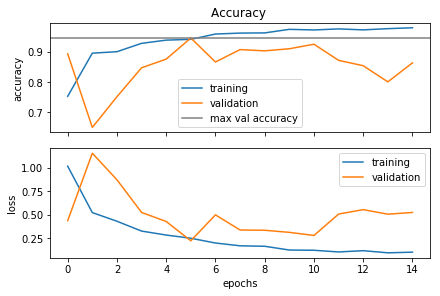

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, constrained_layout=True)

ax1.plot(history.history['acc'],label="training")
ax1.plot(history.history['val_acc'],label="validation")
ax1.axhline(max(history.history['val_acc']),color="grey",label="max val accuracy")
ax1.set_title("Accuracy ")
ax1.set_ylabel("accuracy")

ax1.legend()
ax2.plot(history.history['loss'],label="training")
ax2.plot(history.history['val_loss'],label="validation")
ax2.set_xlabel("epochs")
ax2.set_ylabel("loss")
ax2.legend()


"""to save fig as pdf:"""
fname="My_Drive/My Drive/TransferedMatlabcode/plot_training_resnet_Adadelta"
#plt.savefig(fname, format="pdf")
